In [1]:
myapi = 'yourapi'

In [2]:
import numpy as np
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt

In [3]:
android_restaurant = pd.read_excel('android_restaurant.xlsx')

In [4]:
android = pd.read_excel('android.xlsx')

In [5]:
android_checkin = pd.read_excel('android_checkin.xlsx')

In [6]:
android_restaurant_id = android_checkin['restaurant_id']

In [7]:
android_restaurant

,id,name,region_id,latitude,longitude,price_range,parking,credit_card_accepted,good_for_groups,good_for_kids,...,tmp_cdc_trigger,qr_code_accepted,premium,portrait_mode,portrait_mode_cover_photo_id,truemoney_wallet,likely_incorrect_business_location,gross_profit_enabled,gross_profit_deduction_ratio,gid
0,2,บ้านกลมกิ๊ก,46,13.739125,100.550231,3.0,1.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4,Kosirae,180,13.724959,100.579726,3.0,1.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,Ho Kitchen Seafood,66,13.687334,100.550815,4.0,3.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6,Barley Bistro & Bar,12642,13.726499,100.529425,3.0,3.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,7,Sirocco,32,13.721486,100.516918,5.0,3.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,8,Steak Bkk,152,13.728473,100.657228,2.0,1.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,9,Peony Teafe' & Gallery,32,13.725478,100.538059,2.0,1.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,10,คิวซัง ราเมน,152,13.728745,100.657078,2.0,1.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,14,เจ๊โอว ข้าวต้มเป็ด,43,13.742467,100.522484,2.0,1.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,15,Author's Lounge,34,13.723915,100.514396,5.0,2.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
temp = android_restaurant[['id', 'name', 'latitude', 'longitude']]
temp2 = pd.DataFrame(android_restaurant_id)
temp3 = pd.merge(temp2, temp, left_on='restaurant_id', right_on='id')
locations = temp3[['latitude', 'longitude']]

In [9]:
from gmplot import *
import gmaps
import gmaps.datasets
from IPython.display import IFrame

In [10]:
locations.values

array([[ 13.73912484, 100.55023057],
       [ 13.73912484, 100.55023057],
       [ 13.73912484, 100.55023057],
       ...,
       [ 13.6326219 , 100.7108522 ],
       [ 13.6326219 , 100.7108522 ],
       [ 13.6326219 , 100.7108522 ]])

In [11]:
gmaps.configure(api_key=myapi)
fig = gmaps.figure()
fig.add_layer(gmaps.heatmap_layer(locations, point_radius=5, max_intensity=100))
fig

In [13]:
android_restaurant['price_range'].unique()

array([ 3.,  4.,  5.,  2.,  1., nan])

In [14]:
import seaborn as sns

In [17]:
temp = android_restaurant[['id', 'name', 'price_range', 'avg_price']]
temp2 = pd.DataFrame(android_restaurant_id)
temp3 = pd.merge(temp2, temp, left_on='restaurant_id', right_on='id')
android_price_range = temp3['price_range']
android_price_range_freq = pd.DataFrame(android_price_range).groupby('price_range').size() / len(android_price_range) # normalised
android_price_range_freq = android_price_range_freq.reset_index()
android_price_range_freq.columns = ['price_range', 'frequency']
android_price_range_freq['price_range'] = ['< 100 Baht', '100 - 250 Baht', '251 - 500 Baht', '501 - 1000 Baht', '1000 Baht']

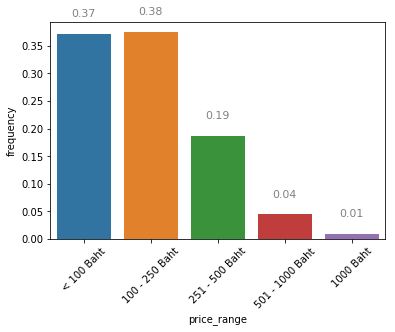

In [23]:
ax = sns.barplot(android_price_range_freq['price_range'], android_price_range_freq['frequency'])
for p in ax.patches:
             ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=11, color='gray', xytext=(0, 20),
                 textcoords='offset points')
for item in ax.get_xticklabels():
    item.set_rotation(45)